# (Feb-2019 Ford GoBike Trip Dataset Exploration)
## by (Walid Ismail)

## Introduction

Our dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In the following sections, we will analyze the information in the dataset and see what insights we can discover from it about rides and cyclists demographics.

## Import Modules and Load Dataset

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('default')
%matplotlib inline

In [4]:
df_trips = pd.read_csv("./Datasets/201902-fordgobike-tripdata.csv")
df_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# how many rows and columns
df_trips.shape

(183412, 16)

In [6]:
# what are the columns data types and do we have columns with null values
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Data Wrangling
### Create New Columns

In [7]:
# Convert date / time fields to datetime data type
df_trips['start_time'] = pd.to_datetime(df_trips['start_time'])
df_trips['end_time'] = pd.to_datetime(df_trips['end_time'])

In [8]:
# Add duration in minutes column
df_trips['duration_min'] = df_trips['duration_sec'] / 60

In [9]:
# Add weekday for further analysis
import calendar
df_trips['day'] = df_trips['start_time'].apply(lambda x: calendar.day_name[x.weekday()])

# Order it
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekdays_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

df_trips['day'] = df_trips['day'].astype(weekdays_classes);

def is_weekend(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return "No"
    else:
        return "Yes"

df_trips['weekend'] = df_trips['day'].apply(is_weekend)

In [10]:
# Create Age column
df_trips['age'] = df_trips['start_time'].apply(lambda x: x.year) - df_trips['member_birth_year']

df_trips['age'].min(), df_trips['age'].max()

(18.0, 141.0)

In [11]:
# Create age groups column
age_groups = ['Under 12', '12-17 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65-74 years old', '75 years or older']

# Create age groups
df_trips['age_group'] = pd.cut(df_trips['age'], [0, 12, 18, 25, 35, 45, 55, 65, 75, df_trips['age'].max()+1], labels=age_groups, right=False)

age_groups_type = pd.api.types.CategoricalDtype(ordered=True, categories=age_groups)

df_trips['age_group'] = df_trips['age_group'].astype(age_groups_type)
df_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,day,weekend,age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,Thursday,No,35.0,35-44 years old
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,Thursday,No,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,Thursday,No,47.0,45-54 years old
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,Thursday,No,30.0,25-34 years old
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,Thursday,No,45.0,45-54 years old


In [12]:
# Generate lat, long to city map if not present and add city column to start and end stations

# import library and create object for city lookup given latitude and longitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="fordgobike_explorer")

# retrieve city given latitude and longitude
def map_station_to_city(station_latitude, station_longitude):
    location = geolocator.reverse("{}, {}".format(station_latitude, station_longitude))
    try:
        city = location.raw['address']['city']
    except:
        city = location.raw['address']['town']
    return city

# Append city to latitude and longitude column in a row
def append_station_city(row):
    row['city'] = map_station_to_city(row['latitude'], row['longitude'])
    return row

# function to generate a dataframe of latitude and longitude and corresponding city
def generate_lat_long_df():
    # retrieve all stations coordintaes in one dataframe
    id = []
    latitudes = []
    longitudes = []

    for index, row in df_trips.iterrows():
        id.append(row['start_station_id'])
        latitudes.append(row['start_station_latitude'])
        longitudes.append(row['start_station_longitude'])

        id.append(row['end_station_id'])
        latitudes.append(row['end_station_latitude'])
        longitudes.append(row['end_station_longitude'])

    lat_long_df = pd.DataFrame({'id': id,
                                'latitude': latitudes,
                                'longitude': longitudes})

    lat_long_df.drop_duplicates(subset = ['id'], inplace=True)

    lat_long_df = lat_long_df.apply(append_station_city, axis=1)
    lat_long_df.head()
    lat_long_df.to_csv("./Datasets/lat_long_city.csv", index=False)

    return lat_long_df

# load/generate latitude, longitude and city CSV file
try:
    lat_long_df = pd.read_csv("./Datasets/lat_long_city.csv")
except:
    lat_long_df = generate_lat_long_df()

lat_long_df = lat_long_df.set_index(['id'])

# Create city columns and append to main dataframe
start_city = []
end_city = []
for index, row in df_trips.iterrows():
    if pd.isnull(row['start_station_id']) :
        start_city.append(map_station_to_city(row['start_station_latitude'], row['start_station_longitude']))
        #print("start null")
    else:
        start_city.append(lat_long_df.loc[row['start_station_id']]['city'])
    
    if pd.isnull(row['end_station_id']) :
        end_city.append(map_station_to_city(row['end_station_latitude'], row['end_station_longitude']))
        #print("end null")
    else:
        end_city.append(lat_long_df.loc[row['end_station_id']]['city'])

# append start_city and end_city to trips data dataframe
df_trips['start_city'] = start_city
df_trips['end_city'] = end_city    

In [13]:
# What are the start / end cities in our dataset?
df_trips['start_city'].unique(), df_trips['end_city'].unique()

(array(['San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Emeryville',
        'Santa Clara'], dtype=object),
 array(['San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Emeryville',
        'Santa Clara', 'Milpitas'], dtype=object))

In [14]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Summary Statistics / Outliers Detection

In [15]:
df_trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,12.101307,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,29.906496,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,5.416667,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,8.566667,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,13.266667,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.066667,141.000000


From the above descriptive statistics, it appears that the trip duration and cyclist age columns have outliers. Lets investigate those columns in more depth.

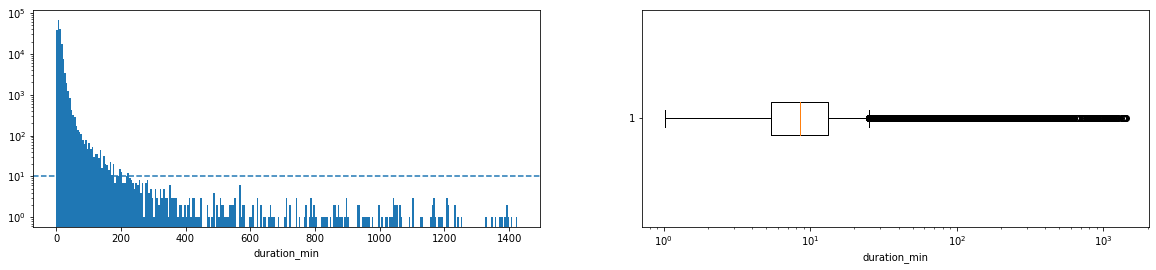

In [16]:
# Visualize duration_min column
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
bins = np.arange(0, df_trips.duration_min.max()+1, 5)
plt.hist(data = df_trips, x = 'duration_min', bins = bins);
plt.xlabel("duration_min")
plt.yscale("log")
plt.axhline(10, linestyle = '--')

plt.subplot(1, 2, 2)
plt.boxplot(df_trips['duration_min'], vert=False)
plt.xlabel("duration_min")
plt.xscale('log')

In [17]:
# How many points are considered outliers by the boxplot? top_whisker = 1.5 * IQR + Q3
duration_min_top_whisker = 1.5 * (df_trips['duration_min'].describe()['75%'] - df_trips['duration_min'].describe()['25%']) + df_trips['duration_min'].describe()['75%']
duration_min_top_whisker

25.041666666666668

In [18]:
(df_trips['duration_min'] > duration_min_top_whisker).sum()

10131

In [19]:
# drop rows with duration_min outliers
#df_trips = df_trips[df_trips['duration_min'] <= duration_top_whisker]

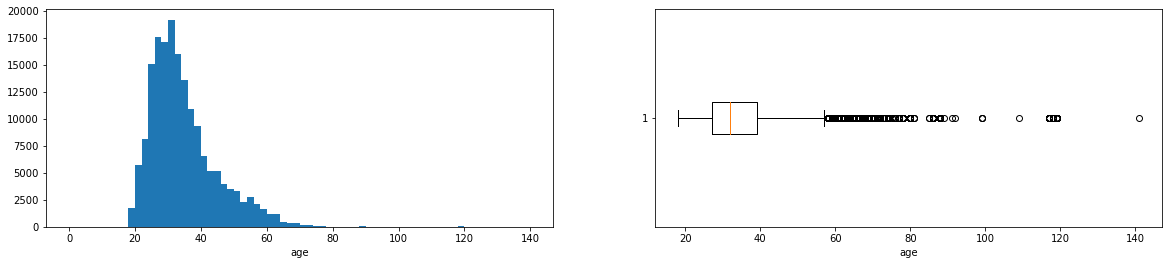

In [20]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
bins = np.arange(0, df_trips.age.max()+1, 2)
plt.hist(data = df_trips, x = 'age', bins = bins);
plt.xlabel("age")
#plt.yscale("log")

plt.subplot(1, 2, 2)
plt.boxplot(df_trips['age'].dropna(), vert=False) # age columns contains NaN so will need to filter thosse out to get the boxplot to render correctly
plt.xlabel("age");
#plt.xscale('log')

In [21]:
# How many age points are outliers?
age_top_whisker = 1.5 * (df_trips['age'].describe()['75%'] - df_trips['age'].describe()['25%']) + df_trips['age'].describe()['75%']
age_top_whisker
(df_trips['age'] > age_top_whisker).sum()

5782

In [22]:
# Drop rows with age outliers
#df_trips = df_trips[df_trips['age'] <= age_top_whisker]

In [23]:
# Check for NaN values
df_trips.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
day                           0
weekend                       0
age                        8265
age_group                  8265
start_city                    0
end_city                      0
dtype: int64

In [24]:
# Check how many "Other" as gender type and drop if relatively few
df_group = df_trips.groupby("member_gender").size()
df_group

member_gender
Female     40844
Male      130651
Other       3652
dtype: int64

In [25]:
#df_trips.drop(index = df_trips.index[df_trips['member_gender'] == 'Other'], inplace = True)

df_group = df_trips.groupby("member_gender").size()
df_group

member_gender
Female     40844
Male      130651
Other       3652
dtype: int64

### Summary Statistics

In [26]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [27]:
df_trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,12.101307,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,29.906496,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,5.416667,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,8.566667,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,13.266667,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.066667,141.000000


In [28]:
df_trips.shape

(183412, 23)

### What is the structure of your dataset?

The dataset consists of approx 180k observations and 23 columns (included derived columns) 

### What is/are the main feature(s) of interest in your dataset?

Each observation includes information about trip start/end time as well as start/end station. In addtion we get information about the bike used and the gender/birth year of the cyclist taking the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following feature are good subjects for analysis:
- Trip start time
- Trip day
- Trip city
- Trip duration (in minutes)
- Cyclist age/age group
- Cyclist gender
- Stations latitude / longitude

## Univariate Exploration
In this section we use histograms / bar charts to discover distributions of numeric / categorical features.

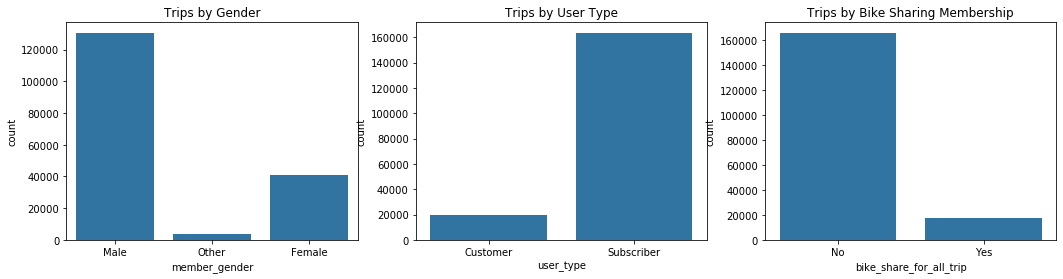

In [29]:
plt.figure(figsize=(24, 4))
ax = plt.subplot(1, 4, 1)
sb.countplot(data=df_trips, x='member_gender', color=sb.color_palette()[0])
plt.title("Trips by Gender")

plt.subplot(1, 4, 2)
sb.countplot(data=df_trips, x='user_type', color=sb.color_palette()[0])
plt.title("Trips by User Type")

plt.subplot(1, 4, 3)
sb.countplot(data=df_trips, x='bike_share_for_all_trip', color=sb.color_palette()[0])
plt.title("Trips by Bike Sharing Membership");

The above charts show that our cyclists are mostly males, and mostly subscibers. Also note that most trips are for cyclists not enrolled in the <b>Bike Share for All</b> program for low-income residents

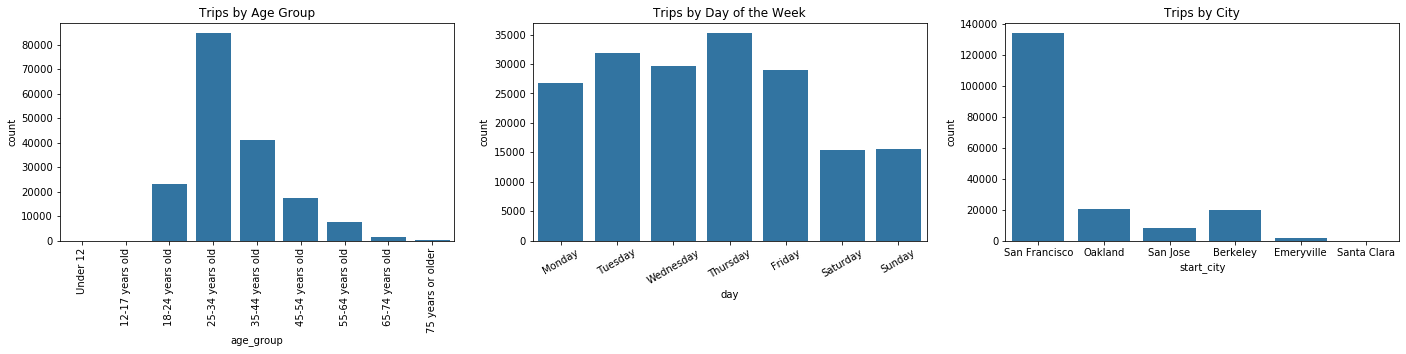

In [30]:
plt.figure(figsize=(24, 4))

# What is the number of trips by age group?
plt.subplot(1, 3, 1)
sb.countplot(data=df_trips, x='age_group', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Trips by Age Group");

plt.subplot(1, 3, 2)
sb.countplot(data=df_trips, x='day', color=sb.color_palette()[0])
plt.xticks(rotation=30);
plt.title("Trips by Day of the Week");

plt.subplot(1, 3, 3)
sb.countplot(data=df_trips, x='start_city', color=sb.color_palette()[0])
plt.title("Trips by City");

The above charts show that most of our cyclists are in <b>San Francisco</b> and in the <b>25-34 age group</b>. We can also see that most trips are taken on <b>Thursdays</b> and notice a sharp decline in the number of trip during the weekend. Maybe our cyclists are using their rides to commute to work??

Mean trip duration = 12.10130725724962 minutes
Number of trips above 50 minutes = 2322
Number of trips above 100 minutes = 909


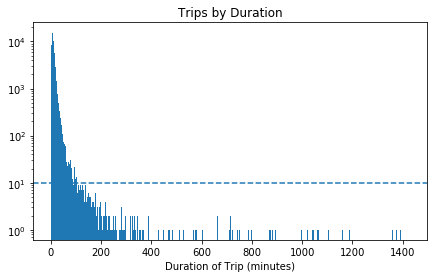

In [31]:
plt.figure(figsize=(24, 4))

plt.subplot(1, 3, 1)
bins = np.arange(0, df_trips.duration_min.max()+1, 1)
plt.hist(data = df_trips, x = 'duration_min', bins = bins);
plt.xlabel("Duration of Trip (minutes)")
plt.yscale("log")
plt.title("Trips by Duration");
plt.axhline(10, linestyle = '--')
print("Mean trip duration = {} minutes".format(df_trips['duration_min'].mean()))
print("Number of trips above 50 minutes = {}".format((df_trips['duration_min'] > 50).sum()))
print("Number of trips above 100 minutes = {}".format((df_trips['duration_min'] > 100).sum()))

We can see from the above distribution that most of the trips are in the <b>5-10 minutes range</b> with a <b>trip mean of 12 minutes</b> and a long skew to the right of long individual trips.

In [32]:
def get_city_coordinates(name):
    from geopy.geocoders import Nominatim

    # Visualize Stations
    address = name

    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(name, latitude, longitude))

    return latitude, longitude

In [33]:
df_start_stations = df_trips[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']]
df_start_stations = df_start_stations.drop_duplicates()
len(df_start_stations)

343

In [34]:
color_map = {0: '#FFC300', 1: '#FF5733', 2: '#C70039', 3: '#900C3F', 4: '#581845'}
#color_map = {0: '#AED6F1', 1: '#85C1E9', 2: '#3498DB', 3: '#2E86C1', 4: '#2874A6'}

In [35]:
df_start_stations = df_trips.groupby(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']).size().to_frame('trips')
df_start_stations = df_start_stations.reset_index()
df_start_stations['trip_cat'] = pd.cut(df_start_stations['trips'], bins = 5, labels = [0, 1, 2, 3, 4])
df_start_stations['color'] = df_start_stations['trip_cat'].apply(lambda x: color_map[x])
df_start_stations

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,trips,trip_cat,color
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2760,3,#900C3F
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,610,0,#FFC300
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2327,2,#C70039
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2082,2,#C70039
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,827,1,#FF5733
...,...,...,...,...,...,...,...
324,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,359,0,#FFC300
325,386.0,24th St at Bartlett St,37.752105,-122.419724,464,0,#FFC300
326,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050,17,0,#FFC300
327,389.0,Taylor St at 9th St,37.353062,-121.891937,13,0,#FFC300


In [36]:
import folium # map rendering library

f = folium.Figure(width=1200, height=450)

address = 'Bay Area, California'

#geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco Bay Area are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, id, name, color, radius in zip(df_start_stations['start_station_latitude'], df_start_stations['start_station_longitude'], df_start_stations['start_station_id'], df_start_stations['start_station_name'], df_start_stations['color'], df_start_stations['trip_cat']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(radius+2)*2,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.


By zooming on the map we can see that most trips start from the stations on <b>Market Street</b> and <b>Townsend Street</b> in San Franciso. For Berkeley most trips start on <b>Bancroft Way</b>. 

In [37]:
df_end_stations = df_trips.groupby(['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']).size().to_frame('trips')
df_end_stations = df_end_stations.reset_index()
df_end_stations['trip_cat'] = pd.cut(df_end_stations['trips'], bins = 5, labels = [0, 1, 2, 3, 4])
df_end_stations['color'] = df_end_stations['trip_cat'].apply(lambda x: color_map[x])
df_end_stations

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trips,trip_cat,color
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2997,3,#900C3F
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,609,0,#FFC300
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2353,2,#C70039
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2512,2,#C70039
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,778,0,#FFC300
...,...,...,...,...,...,...,...
324,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,361,0,#FFC300
325,386.0,24th St at Bartlett St,37.752105,-122.419724,484,0,#FFC300
326,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050,21,0,#FFC300
327,389.0,Taylor St at 9th St,37.353062,-121.891937,11,0,#FFC300


In [38]:
f = folium.Figure(width=1200, height=450)

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, id, name, color, radius in zip(df_end_stations['end_station_latitude'], df_end_stations['end_station_longitude'], df_end_stations['end_station_id'], df_end_stations['end_station_name'], df_end_stations['color'], df_end_stations['trip_cat']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(radius+2)*2,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

The above map shows that most trips end at stations on <b>Market Street</b> and <b>Townsend Street</b> too. For Berkeley most trips end on <b>Bancroft Way</b>.

#### We can summarize the findings from our univariate plots as follows:
- Our cyclists are mostly males, and mostly subscibers.
- The vast majority of trips are for cyclists not enrolled in the <b>Bike Share for All</b> program for low-income residents.
- The majority of trips are in San Francisco followed by Oakland and Berkeley
- Most of our cyclists are in the  <b>25-34 age group</b>.
- Most trips are taken on <b>Thursdays</b>.
- We see a sharp decline in the number of trip during the weekend.
- The average trip duration is 12 minutes with vast majority of trips falling the 5-10 minutes range.


#### We observed the following unusual characteristics in the dataset:
- All rows in the dataset contain the most important trip data like start/end station/datetime and trip duration.

- The duration of trips range from low single digits to 1400 minutes. However, the total number of trips that are above 200 minutes is approx 900 trips of more than 180K trips in our dataset. We decided against removiing these and other outliers above 25 minutes since they are approx 10,000 trips or 5% of the observations with valuable trip data and many of them contain trip span of more than 1 day so maybe they are just our cyclists returning bikes late.
- There are approx 8265 observations with missing birth year values. We did not remove those rows as the main trip data like start/end station/timestamp are not missing for the entire dataset so we can still get valuable information from these trip although we arfe missing the age value for them.

- There are 197 stations with missing ID and name, however the stations latitude/longitude values are not missing so we could still get the station location and city so these rows were not removed as well.

- We derived a column to store trip duration in minutes for more practical analysis of trip duration.

- We divided the age of cyclists to 9 age groups to identify which age group uses our bikes the most.

- Using station latitude and longitude information we created start_city and end_city columns to where most of the trips take place.

## Bivariate Exploration

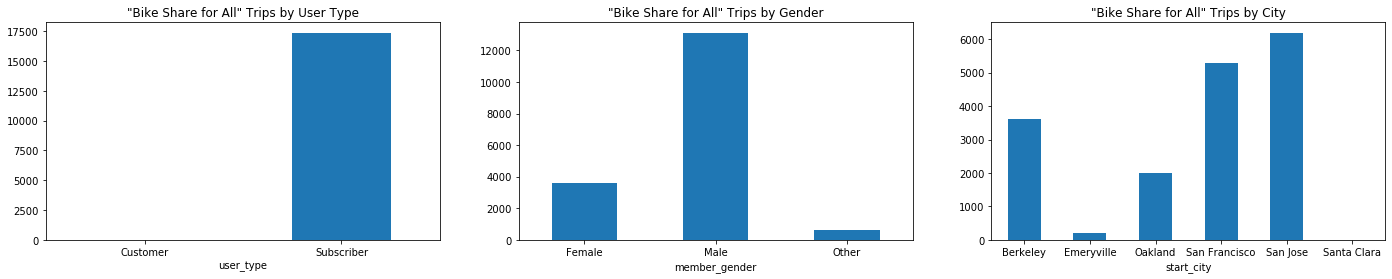

In [39]:
plt.figure(figsize=(24, 4))
#plt.subplots(2, 3)

ax = plt.subplot(1, 3, 1)
# Number of trips by gender and user_type
df_trips.groupby(['user_type', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by User Type', rot=0)

ax = plt.subplot(1, 3, 2)
# Number of trips by gender and user_type
df_trips.groupby(['member_gender', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by Gender', rot=0)

ax = plt.subplot(1, 3, 3)
# In which city are most "Bike Share for All" rides taken??
df_trips.groupby(['start_city', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by City', rot=0);

We can see from charts above:
- All <b>"Bike Share for All"</b> trips are taken by <b>Subscribers</b>.
- Also, the vast majority of them are <b>males</b> and their trips are mainly in <b>San Jose, San Francisco and Berkeley</b>.

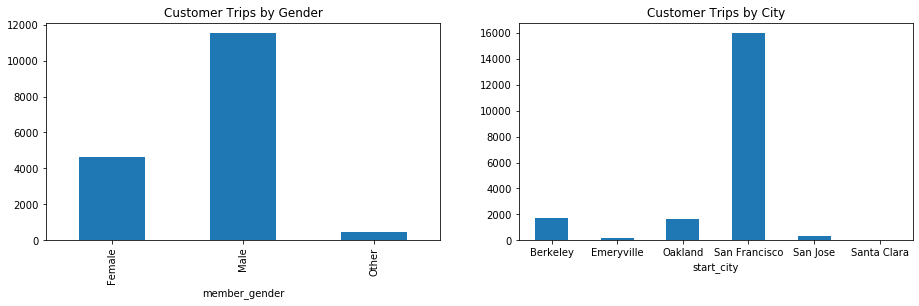

In [49]:
plt.figure(figsize=(24, 4))

ax = plt.subplot(1, 3, 1)
# Number of trips by gender and user_type
df_trips.groupby(['member_gender', 'user_type']).size().unstack()['Customer'].plot(kind='bar', ax=ax, title = 'Customer Trips by Gender', rot=90)

ax = plt.subplot(1, 3, 2)
# In which city are most "Bike Share for All" rides taken??
df_trips.groupby(['start_city', 'user_type']).size().unstack()['Customer'].plot(kind='bar', ax=ax, title = 'Customer Trips by City', rot=0);

We can see from charts above:
- The vast majority of Customer trips are taken by males.
- The vast majority of Customer trip are in San Francisco.

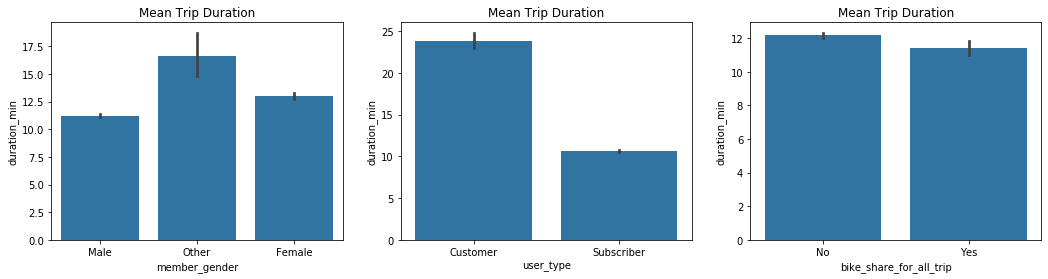

In [41]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
sb.barplot(data=df_trips, x='member_gender', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,4,2)
sb.barplot(data=df_trips, x='user_type', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,4,3)
sb.barplot(data=df_trips, x='bike_share_for_all_trip', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

We observe the following insights with regards to mean duration of trips:
- Average trip duration is highest for "Other" gender category. 
- Trip duration is slightly higher for females than males.
- Average trips duration for Customers is more than double that for Subrcibers. 
- Cyclists in the "Bike Share for All" program take slightly shorter trips than other Cyclists.

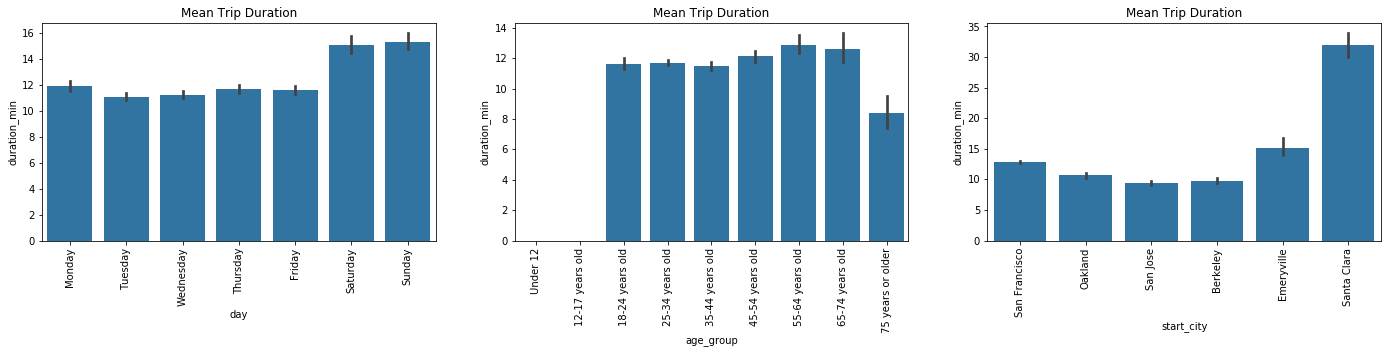

In [42]:
plt.figure(figsize=(24, 4))

plt.subplot(1,3,1)
sb.barplot(data=df_trips, x='day', y='duration_min', color=sb.color_palette()[0])
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sb.barplot(data=df_trips, x='age_group', y='duration_min', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,3,3)
sb.barplot(data=df_trips, x='start_city', y='duration_min', color=sb.color_palette()[0])
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

Note the following:
- Mean trip duration is approx the same across weekdays (with a notable increase in the weekend).
- Trip duration is practically the same across age groups with those in above 75 years age group taking shorter trip on average.
- Average trip durations in Santa Clara is almost double trip durations in other cities.

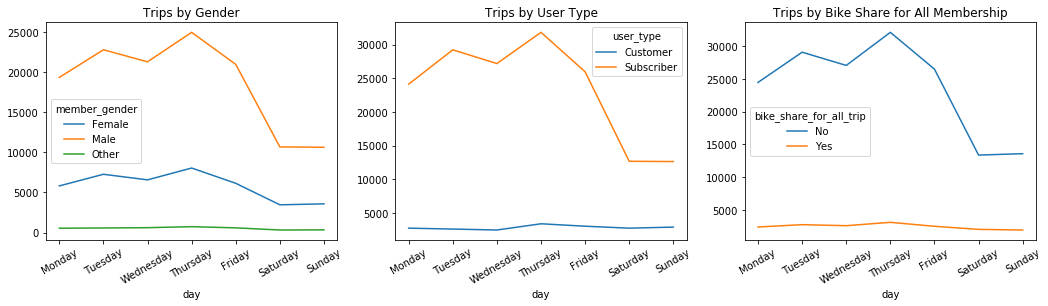

In [50]:
plt.figure(figsize=(24, 4))

ax = plt.subplot(1, 4, 1)
df_trips.groupby(['day', 'member_gender']).size().unstack().plot(ax = ax)
plt.title("Trips by Gender");
plt.xticks(rotation = 30)

ax = plt.subplot(1, 4, 2)
df_trips.groupby(['day', 'user_type']).size().unstack().plot(ax = ax)
plt.title("Trips by User Type");
plt.xticks(rotation = 30);

ax = plt.subplot(1, 4, 3)
df_trips.groupby(['day', 'bike_share_for_all_trip']).size().unstack().plot(ax = ax)
plt.title("Trips by Bike Share for All Membership");
plt.xticks(rotation = 30);

The above plots confirm the pattern of sharp decline in number of trips on Saturday and Sundays continues across gender, user type, bike share program and age groups. We can also see that Thursday is the day for most trips taken across the four categories.

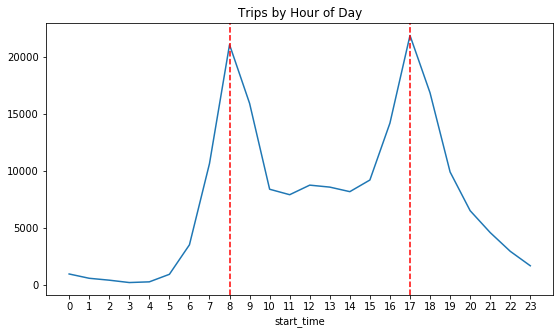

In [52]:
fig = plt.figure(figsize = [20,5])

ax = plt.subplot(1, 2, 1)
df_trips.groupby([df_trips['start_time'].dt.hour]).size().plot()
plt.title("Trips by Hour of Day");

plt.axvline(8, linestyle = '--', color='r')
plt.xticks([_ for _ in range(24)])
plt.axvline(17,linestyle = '--', color='r');

The line plot above show a very interesting trend. We can clearly see that <b>most of the trips start at 8AM and at 5PM</b> which is a strong sign that cyclists use  our bikes to commute to/from work. We also see a smaller flat peek of around a 10000 trips during the whole week between 10 AM and 3PM.

#### We can summarize our bivariate findings as follows:
- Average trip duration is highest for "Other" gender category. 
- Trip duration is slightly higher for females tha males.
- Average trips duration for Customers is more than double that for Subrcibers. 
- Cyclists in the "Bike Share for All" program take slightly shorter trips than other Cyclists.
- Mean trip duration is approx the same across weekdays (with a notable increase in the weekend days).
- Trip duration is practically the same across age groups with those in above 75 years age group taking shorter trip on average.
- The vast majority of them are >males and their trips are mainly in San Jose, San Francisco and Berkeley.

#### The following relationships are interesting:
- The vast majority of Customer trip are in San Francisco.
- Average trip durations in Santa Clara is almost double trip durations in other cities.
- ALL <b>"Bike Share for All"</b> trips are taken by <b>Subscribers</b>.
- Most of the trips start at 8AM and at 5PM which is a strong sign that cyclists use  our bikes to commute to/from work.

## Multivariate Exploration

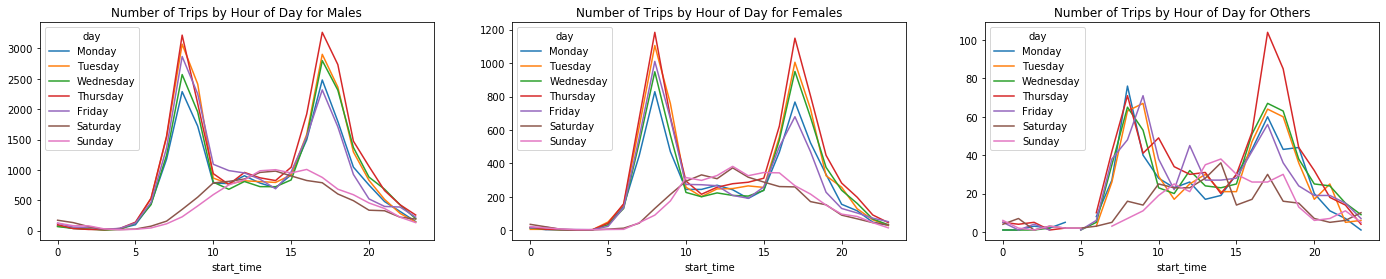

In [45]:
fig, axes = plt.subplots(ncols = 3, figsize = [24,4])

df_trips[df_trips['member_gender'] == "Male"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Males", ax = axes[0]);

df_trips[df_trips['member_gender'] == "Female"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Females", ax = axes[1]);

df_trips[df_trips['member_gender'] == "Other"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Others", ax = axes[2]);

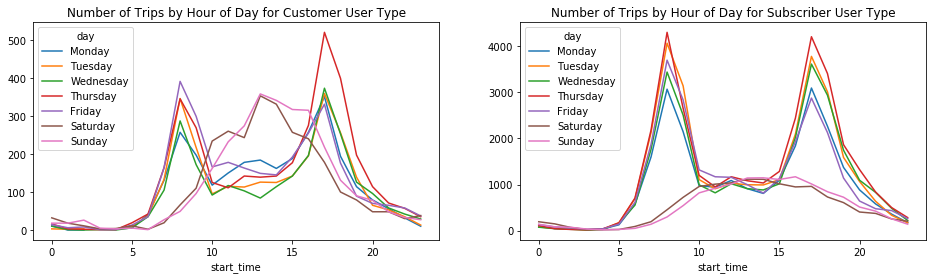

In [46]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,4])

df_trips[df_trips['user_type'] == "Customer"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Customer User Type", ax = axes[0]);

df_trips[df_trips['user_type'] == "Subscriber"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Subscriber User Type", ax = axes[1]);

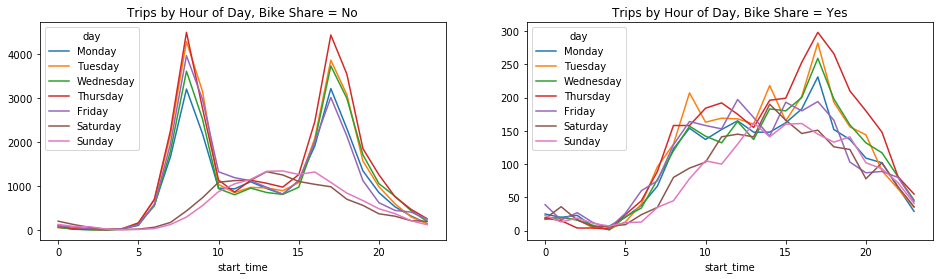

In [47]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,4])

df_trips[df_trips['bike_share_for_all_trip'] == "No"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Trips by Hour of Day, Bike Share = No", ax = axes[0]);

df_trips[df_trips['bike_share_for_all_trip'] == "Yes"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Trips by Hour of Day, Bike Share = Yes", ax = axes[1]);

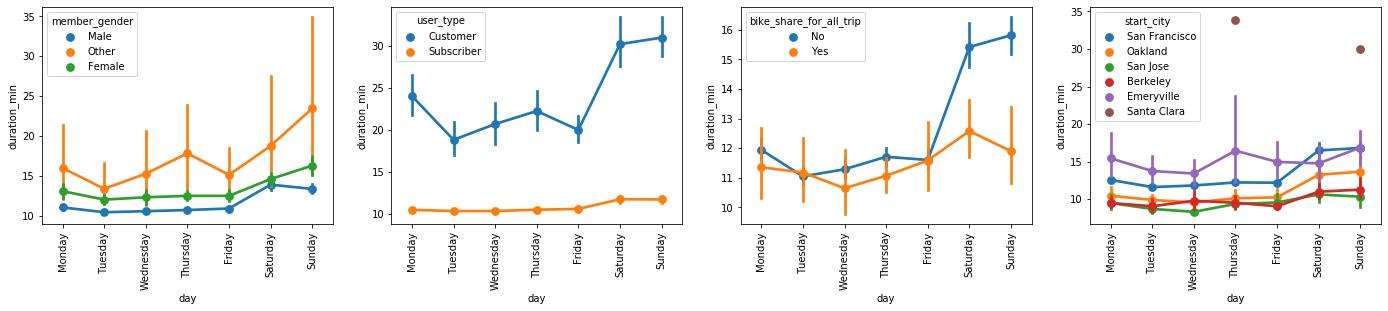

In [48]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='member_gender')
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

plt.subplot(1,4,2)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='user_type')
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

plt.subplot(1,4,3)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='bike_share_for_all_trip')
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

plt.subplot(1,4,4)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='start_city')
plt.title("Mean Trip Duration");
plt.xticks(rotation=90);

#### We can summarize our multivariate finidings as follows:
- The aggregate hourly trend for trips continues across gender (male/female).
- The aggregate hourly trend for trips continues for Subcribers.
- The aggregate hourly trend for trips continues for those not enrolled in the "Bike Share for All" program.
- The high average duration of trips continues for "Other" gender across the days of the week compared to males and females.
- "Customers" continue to take longer trips across the days of the week.
- The trip duration is practically the same for those enrolled in the "Bike Share" program across the week, while it inscreases considerably for those not enrolled in the program during the weekend compared to the weekdays.

#### The following relationships are interesting:
- There is a noticable difference in the hourly trend for "Others" gender type.
- It is noticably different for Customer user type too with relatively high number of trips in the weekend comparef to the trend observed for Subcribers.
- It is also different for those enrolled in the "Bike Share for All" program with trips relatively high across the day.

## 6. Conclusions
The analysis of the dataset provides the folllowing insights:
- The vast majority of trips are taken by males.
- The vast majority of trips are for cyclists not enrolled in the <b>Bike Share for All</b> program.
- The majority of trips are in San Francisco.
- Most of our cyclists are in the 25-34 age group.
- Most trips are taken on Thursdays.
- We see a sharp decline in the number of trip during the weekend.
- The average trip duration is 12 minutes.
- ALL "Bike Share for All" trips are taken by Subscribers.
- Most of the trips start at 8AM and at 5PM which is a strong sign that cyclists use  our bikes to commute to/from work.

## Thank you!